<a href="https://colab.research.google.com/github/Angelawork/Drug-Recommendation_MAIS202/blob/main/src/SymptomToDrug_MIMIC_III_Angela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATC to drug name:https://www.whocc.no/atc_ddd_index/, https://go.drugbank.com/atc

# Data preprocess

In [ ]:
import ast
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, jaccard_score

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/McGill U2/MAIS 202/MAIS 202 Project/Datasets/MIMIC3.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=df[:2500]# take the first 2500 rows
print(df.head())

   SUBJECT_ID   HADM_ID                                            symptom  \
0           4  185777.0  ['respiratory distress' 'nausea' 'cough' 'chil...   
1           6  107064.0  ['wound' 'thigh pain' 'numbness' 'anemia' 'pre...   
2           8  159514.0  ['pneumothorax' 'edema' 'distress' 'respirator...   
3           9  150750.0  ['poor mental status' 'sputum' 'pressure' 'arm...   
4          10  184167.0  ['bradycardia' 'apnea' 'warm' 'premature' 'int...   

                                                 NDC  \
0  ['R05D', 'P01B', 'A12B', 'N03A', 'A07E', 'D10A...   
1  ['A06A', 'A12C', 'L04A', 'C07A', 'C08C', 'D11A...   
2                                   ['J01C', 'D06A']   
3  ['A12B', 'B05C', 'C07A', 'A12A', 'A12C', 'J01M...   
4                                   ['J01C', 'D06A']   

                                           ICD9_CODE  \
0  ['3893', '8872', '3323']\nCategories (3, objec...   
1  ['5569', '0091', '3957', '3806', '9904']\nCate...   
2  ['9390', '640', '9955']



1.   SUBJECT_ID: In the context of medical data, this typically refers to a unique identifier assigned to an individual patient in a healthcare database. It's used to distinguish between different patients.
2.   HADM_ID: This stands for Hospital Admission ID. It's a unique identifier assigned to a specific hospital admission record for a patient. Each time a patient is admitted to a hospital, a new HADM_ID is generated.

3. Symptom: A symptom is a subjective indication of a disease or a change in condition that a patient reports. Symptoms are the patient's own description of what they are feeling, such as pain, dizziness, or fatigue.

4. NDC: National Drug Code (NDC) is a unique identifier for medications in the United States. It's used to identify specific drugs, including the manufacturer, the product, and the package size.

5. ICD-9 Code: This refers to the International Classification of Diseases, Ninth Revision, Clinical Modification (ICD-9-CM) code. It's used to classify diseases and a wide variety of signs, symptoms, abnormal findings, complaints, social circumstances, and external causes of injury or disease.

6. PRO_CODE: This term is not widely recognized without specific context. It could refer to procedure codes used in medical billing or coding systems, but the exact meaning would depend on the specific database or system you are referring to.

7. NDC Length (NDC_Len): This could refer to the length of the National Drug Code (NDC). NDCs typically consist of 10 or 11 digits, but the exact length depends on the formatting convention used.

In [ ]:
select_col=['symptom','NDC','ICD9_CODE']
data = data.loc[:, select_col]
print(data.head())

                                             symptom  \
0  ['respiratory distress' 'nausea' 'cough' 'chil...   
1  ['wound' 'thigh pain' 'numbness' 'anemia' 'pre...   
2  ['pneumothorax' 'edema' 'distress' 'respirator...   
3  ['poor mental status' 'sputum' 'pressure' 'arm...   
4  ['bradycardia' 'apnea' 'warm' 'premature' 'int...   

                                                 NDC  \
0  ['R05D', 'P01B', 'A12B', 'N03A', 'A07E', 'D10A...   
1  ['A06A', 'A12C', 'L04A', 'C07A', 'C08C', 'D11A...   
2                                   ['J01C', 'D06A']   
3  ['A12B', 'B05C', 'C07A', 'A12A', 'A12C', 'J01M...   
4                                   ['J01C', 'D06A']   

                                           ICD9_CODE  
0  ['3893', '8872', '3323']\nCategories (3, objec...  
1  ['5569', '0091', '3957', '3806', '9904']\nCate...  
2  ['9390', '640', '9955']\nCategories (3, object...  
3  ['9672', '9604']\nCategories (2, object): ['96...  
4  ['9983', '9915', '966']\nCategories (3, object..

# preprocess - bag of words

In [ ]:
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

data['symptom'] = data['symptom'].apply(lambda x: ast.literal_eval(x))
data['NDC'] = data['NDC'].apply(lambda x: ast.literal_eval(x))

# Using CountVectorizer for Bag of Words encoding
count_vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X_count = count_vectorizer.fit_transform(data['symptom'].apply(lambda x: ' '.join(x)))
# Convert NDC labels into binary format using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(data['NDC'])

X_train, X_test, y_train, y_test = train_test_split(X_count, y_binary, test_size=0.35, random_state=24)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(X_train[0])
print(y_train[0])

  (0, 30)	19
  (0, 17)	29
  (0, 31)	16
  (0, 28)	9
  (0, 21)	18
  (0, 13)	24
  (0, 32)	18
  (0, 27)	12
  (0, 37)	1
  (0, 0)	9
  (0, 16)	5
  (0, 26)	17
  (0, 33)	14
  (0, 15)	7
  (0, 19)	6
  (0, 20)	7
  (0, 24)	9
  (0, 18)	4
  (0, 14)	6
  (0, 25)	10
  (0, 35)	3
  (0, 29)	1
  (0, 23)	3
  (0, 36)	3
[1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0]


Using MultiLabelBinarizer is necessary when dealing with multi-label classification problems.
In a multi-label classification task, each sample (in this case, each set of symptoms) can belong to multiple classes (NDC labels), as opposed to single-label classification where each sample belongs to just one class.

# Evaluate & Save model weights

In [ ]:
def evaluation(y_test, predictions_binary, number=5):
  jaccard_similarity = jaccard_score(y_test, predictions_binary, average='samples')
  f1 = f1_score(y_test, predictions_binary, average='samples')
  print(f"Jaccard Similarity: {jaccard_similarity}")
  print(f"F1 Score: {f1}")

  # Print predictions compared with true labels
  for i in range(number):
      print("Case 1:")
      print(f"True Labels: {mlb.inverse_transform(y_test)[i]}")
      print(f"Predicted Labels: {mlb.inverse_transform(predictions_binary)[i]}")

In [ ]:
import joblib

def save_model(model, name):
  joblib.dump(model, name+'_weights.pkl')
  path='/content/'+name+'_weights.pkl'
  !mv name '/content/drive/MyDrive/McGill U2/MAIS 202/MAIS 202 Project/Model Weights'

#Load model
#model = joblib.load('weights.pkl')

# 1. MultiOutputClassifier with a RandomForestClassifier base estimator
Jaccard Similarity: 0.41001764017153597
F1 Score: 0.5607176883270999

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

model=MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

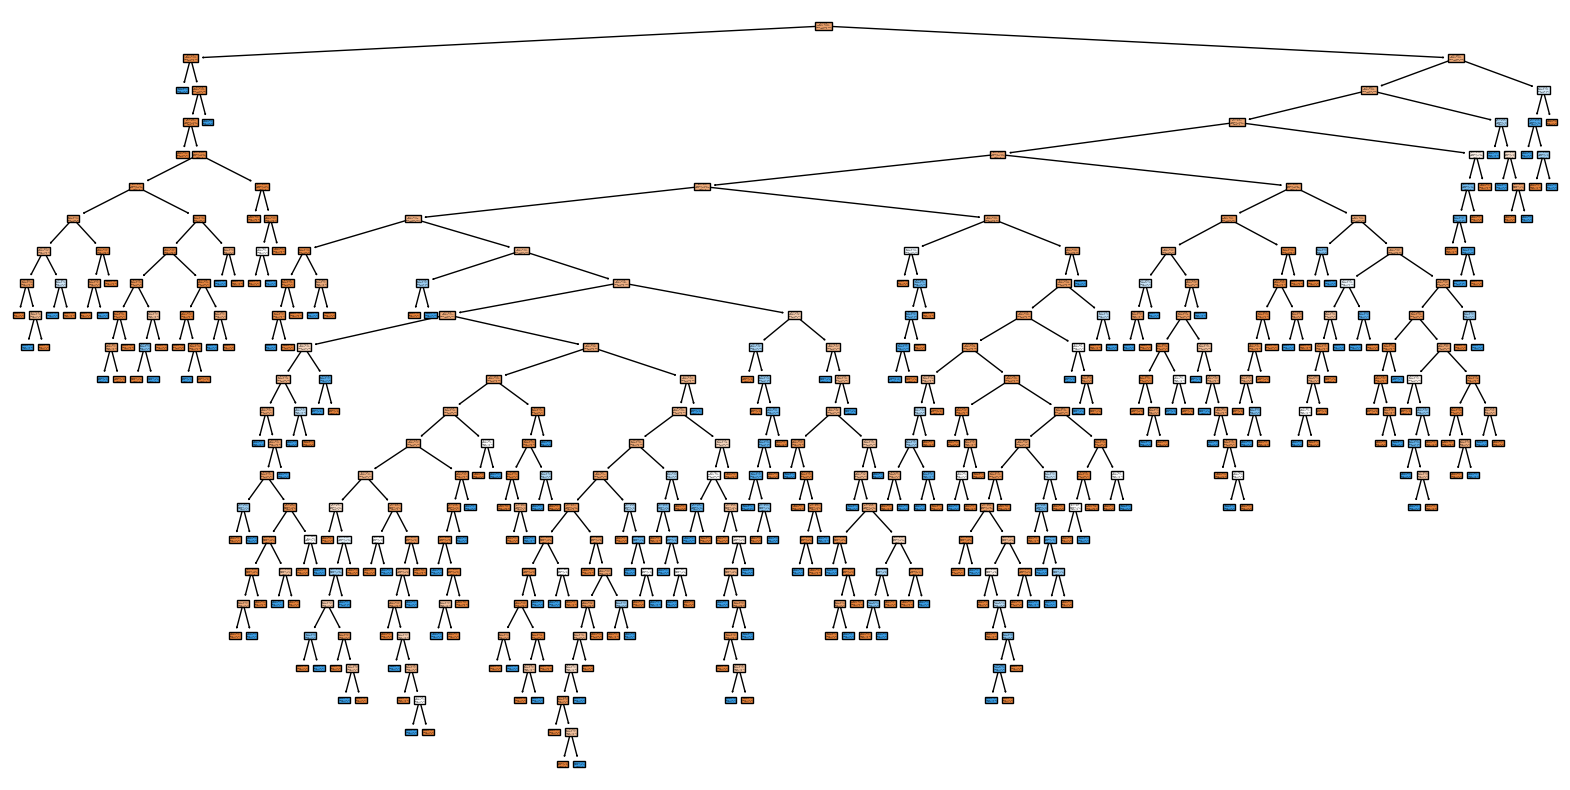

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = model.estimators_[1]
# Visualize
plt.figure(figsize=(20, 10))
plot_tree(estimator.estimators_[0], filled=True, feature_names=count_vectorizer.get_feature_names_out(), class_names=[str(i) for i in range(len(mlb.classes_))])
plt.show()
plt.savefig('RandomForestClassifier')

In [ ]:
save_model(model,"RandomForestClassifier")

In [ ]:
predictions_binary = model.predict(X_test)
predictions = mlb.inverse_transform(predictions_binary)# Convert binary predictions back to drug ATC format
evaluation(y_test, predictions_binary)

Jaccard Similarity: 0.40729474271453414
F1 Score: 0.5583441433882214
Case 1:
True Labels: ('A02B', 'A03F', 'A06A', 'A07A', 'A12C', 'B01A', 'C01B', 'C02A', 'C03C', 'C07A', 'C08C', 'C09A', 'D01A', 'D07A', 'J01C', 'N02A', 'N02B', 'N03A', 'N05B', 'N06A', 'R01A', 'R06A')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'B05C', 'C07A', 'C10A', 'N02A', 'N02B')
Case 1:
True Labels: ('A02A', 'A02B', 'A06A', 'A07A', 'A10B', 'A12A', 'A12C', 'B01A', 'B05C', 'C01E', 'C02D', 'C10A', 'D04A', 'N01A', 'N02A', 'N02B', 'N03A', 'N05C')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12A', 'A12B', 'A12C', 'B01A', 'B05C', 'N02B')
Case 1:
True Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'C07A', 'C09A', 'C10A', 'N02B', 'N05B')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12A', 'A12B', 'A12C', 'B01A', 'B05C', 'C07A', 'C10A', 'N02B')
Case 1:
True Labels: ('A02B', 'A12C', 'D04A', 'D07A', 'N01A', 'N05C')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B05C', 'C07A', 'N02B')

# 2.Multi-class Logistic Regression:
### In the logistic regression classifier, the sigmoid function is applied to the linear combination of input features and model weights to obtain the probability that the input belongs to the positive class. This output is already scaled between 0 and 1 due to the sigmoid function.
Jaccard Similarity: 0.3922128221763671
F1 Score: 0.5395880318922179

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Define the Multi-class Logistic Regression model using one-vs-rest strategy
Logistic_model = OneVsRestClassifier(LogisticRegression(random_state=24, max_iter=1250))
Logistic_model.fit(X_train, y_train)
predictions_binary = Logistic_model.predict(X_test)
evaluation(y_test, predictions_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 13 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 122 is present in all training examples.
  warnings.warn(


Jaccard Similarity: 0.3922128221763671
F1 Score: 0.5395880318922179
Case 1:
True Labels: ('A02B', 'A03F', 'A06A', 'A07A', 'A12C', 'B01A', 'C01B', 'C02A', 'C03C', 'C07A', 'C08C', 'C09A', 'D01A', 'D07A', 'J01C', 'N02A', 'N02B', 'N03A', 'N05B', 'N06A', 'R01A', 'R06A')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'B05C', 'C07A', 'C10A', 'N02A', 'N02B')
Case 1:
True Labels: ('A02A', 'A02B', 'A06A', 'A07A', 'A10B', 'A12A', 'A12C', 'B01A', 'B05C', 'C01E', 'C02D', 'C10A', 'D04A', 'N01A', 'N02A', 'N02B', 'N03A', 'N05C')
Predicted Labels: ('A02B', 'A06A', 'A12A', 'A12B', 'A12C', 'B01A', 'B05C', 'N01A', 'N02B')
Case 1:
True Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'C07A', 'C09A', 'C10A', 'N02B', 'N05B')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'B05C', 'C07A', 'N02B')
Case 1:
True Labels: ('A02B', 'A12C', 'D04A', 'D07A', 'N01A', 'N05C')
Predicted Labels: ('A02B', 'A06A', 'A12C', 'B05C', 'N02B')
Case 1:
True Labels: ('A01A', 'A02A', 'A

In [ ]:
save_model(model,"Multi-class_Logistic_Regression")
!mv '/content/Multi-class_Logistic_Regression_weights.pkl' '/content/drive/MyDrive/McGill U2/MAIS 202/MAIS 202 Project/Model Weights'

# 3.XGBClassifier
Jaccard Similarity: 0.4039256716292771
F1 Score: 0.5552176849135317

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Define the XGBoost classifier
XGBClassifier = XGBClassifier(objective='binary:logistic', random_state=24)
XGBClassifier.fit(X_train, y_train)
predictions_binary = XGBClassifier.predict(X_test)
evaluation(y_test, predictions_binary)

Jaccard Similarity: 0.4039256716292771
F1 Score: 0.5552176849135317
Case 1:
True Labels: ('A02B', 'A03F', 'A06A', 'A07A', 'A12C', 'B01A', 'C01B', 'C02A', 'C03C', 'C07A', 'C08C', 'C09A', 'D01A', 'D07A', 'J01C', 'N02A', 'N02B', 'N03A', 'N05B', 'N06A', 'R01A', 'R06A')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'B05C', 'C03C', 'C07A', 'C10A', 'N02A', 'N02B', 'N03A', 'N06A')
Case 1:
True Labels: ('A02A', 'A02B', 'A06A', 'A07A', 'A10B', 'A12A', 'A12C', 'B01A', 'B05C', 'C01E', 'C02D', 'C10A', 'D04A', 'N01A', 'N02A', 'N02B', 'N03A', 'N05C')
Predicted Labels: ('A02B', 'A06A', 'A12A', 'A12C', 'B01A', 'B05C', 'C03C', 'C07A', 'N01A', 'N02B', 'N03A', 'R03A')
Case 1:
True Labels: ('A01A', 'A02B', 'A06A', 'A12B', 'A12C', 'B01A', 'C07A', 'C09A', 'C10A', 'N02B', 'N05B')
Predicted Labels: ('A01A', 'A02B', 'A06A', 'A07A', 'A12A', 'A12B', 'A12C', 'B01A', 'B05C', 'C07A', 'N02B', 'N05C')
Case 1:
True Labels: ('A02B', 'A12C', 'D04A', 'D07A', 'N01A', 'N05C')
Predicted Labels: ('A02B', 

In [ ]:
save_model(model,"XGBClassifier")

In [ ]:
!mv '/content/XGBClassifier_weights.pkl' '/content/drive/MyDrive/McGill U2/MAIS 202/MAIS 202 Project/Model Weights'

# plotting

In [ ]:
import matplotlib.pyplot as plt

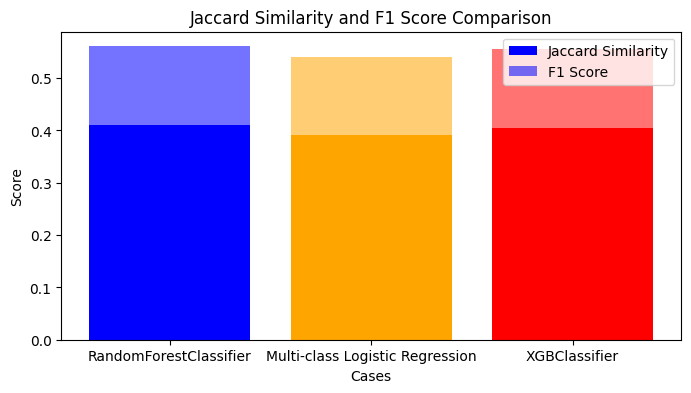

In [ ]:
import matplotlib.pyplot as plt

bar_colors = ['blue', 'orange','red']
cases=['RandomForestClassifier','Multi-class Logistic Regression','XGBClassifier']

jaccard_scores = [0.4100,0.3922,0.4039]
f1_scores = [0.5607,0.5396,0.5552]

plt.figure(figsize=(8, 4))
plt.bar(cases, jaccard_scores, label='Jaccard Similarity',color=bar_colors)
plt.bar(cases, f1_scores, label='F1 Score', alpha=0.55,color=bar_colors)
plt.xlabel('Cases')
plt.ylabel('Score')
plt.title('Jaccard Similarity and F1 Score Comparison')
plt.legend()
plt.show()

## Get the top 6 most common labels:
Top 6 Most Common Label:
* A06A    1959
* A02B    1957
* N02B    1885
* A12C    1821
* B01A    1796
* B05C    1757

In [ ]:
labels = [label for sublist in mlb.inverse_transform(y_binary) for label in sublist]
top_6=pd.Series(labels).value_counts().nlargest(6)
top_6_indices = [mlb.classes_.tolist().index(label) for label in top_6.index.tolist()]
print(f"Top 6 Most Common Label:{top_6}")

Top 6 Most Common Label:A06A    1959
A02B    1957
N02B    1885
A12C    1821
B01A    1796
B05C    1757
dtype: int64


In [ ]:
print(len(mlb.classes_.tolist()))
true_labels = set(mlb.inverse_transform(y_test))
predicted_labels = set(predictions)

124


In [ ]:
top_6_labels=['A06A','A02B','N02B','A12C','B01A','B05C']

In [ ]:
confusion_matrices[0][1][0]

array([[352, 340],
       [ 63,  67]])

<Figure size 500x500 with 0 Axes>

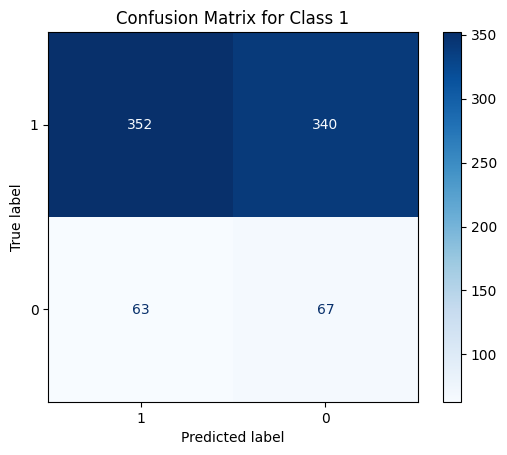

<Figure size 500x500 with 0 Axes>

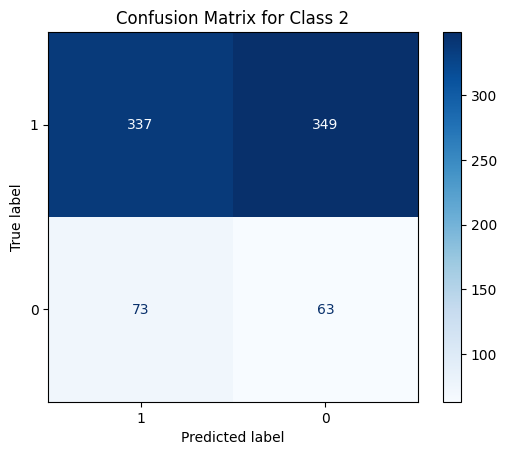

<Figure size 500x500 with 0 Axes>

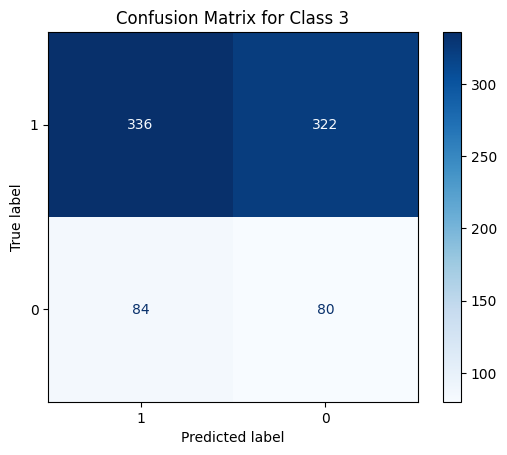

<Figure size 500x500 with 0 Axes>

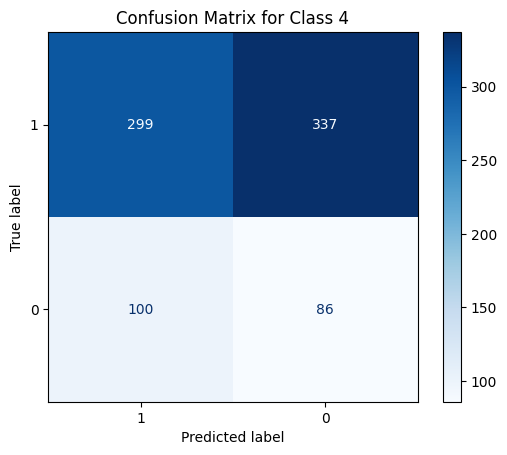

<Figure size 500x500 with 0 Axes>

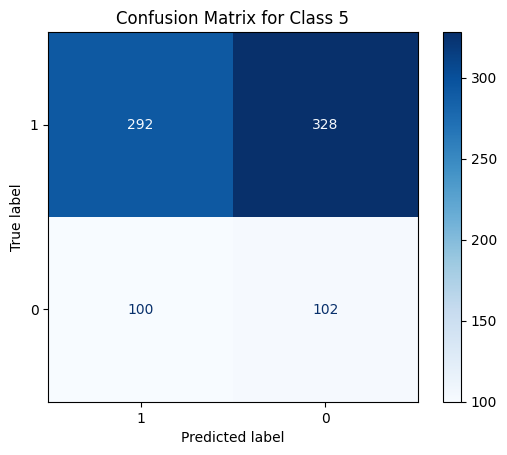

<Figure size 500x500 with 0 Axes>

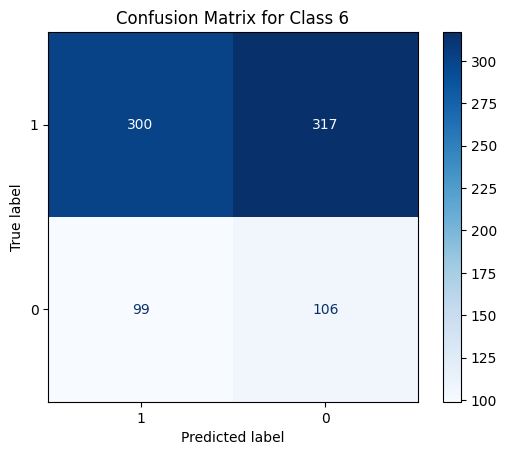

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create an empty list to store the confusion matrices
confusion_matrices = []

for label in top_6_labels:
    true_labels = set(mlb.inverse_transform(y_test))
    predicted_labels = set(predictions)

    true_labels = [label in labels for labels in true_labels]
    predicted_labels = [label in labels for labels in predicted_labels]

    max_length = max(len(true_labels), len(predicted_labels))
    true_labels += [False] * (max_length - len(true_labels))
    predicted_labels += [False] * (max_length - len(predicted_labels))
    cm = multilabel_confusion_matrix(true_labels, predicted_labels)
    confusion_matrices.append((label, cm))

# Plot the confusion matrix
for i in range(len(confusion_matrices)):
    plt.figure(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[i][1][0],
                                   display_labels=[1,0])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Class {i+1}')
    plt.show()


In [ ]:
multilabel_confusion_matrix(true_labels, predicted_labels)

array([[[352, 340],
        [ 63,  67]],

       [[ 67,  63],
        [340, 352]]])

<ipython-input-40-b770fbb8d744>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm)


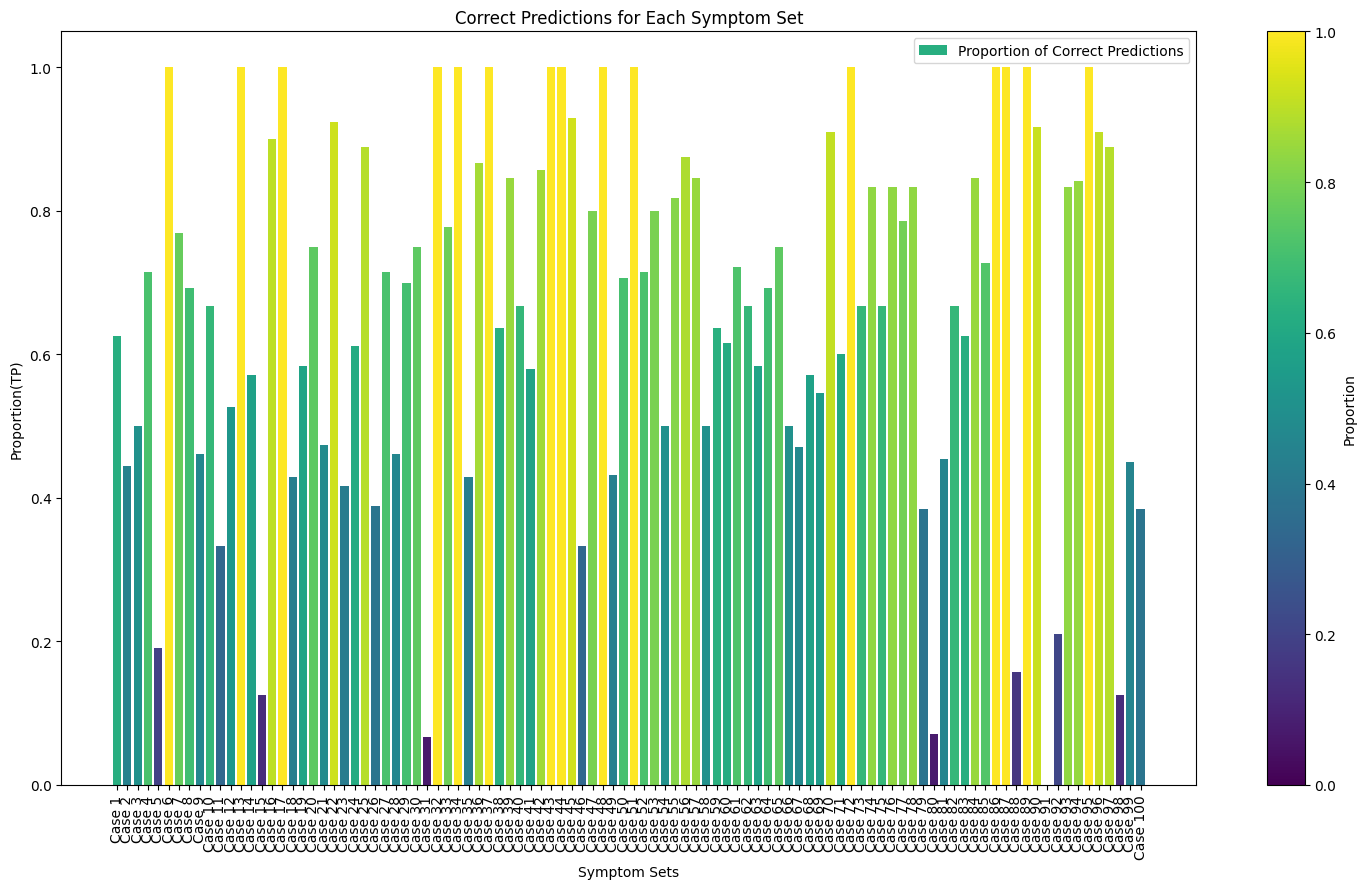

In [ ]:
from matplotlib.cm import ScalarMappable

true_positives = []
false_positives = []

for true, predicted in zip(true_labels, predicted_labels):
    # Count TP
    true_pos = len(set(true).intersection(set(predicted)))
    true_positives.append(true_pos)
    # Count FP
    false_pos = len(set(predicted).difference(set(true)))
    false_positives.append(false_pos)

true_positives=true_positives[:100]
false_positives=false_positives[:100]
# for mismatch length issues
max_length = max(len(true_positives), len(false_positives))
true_positives += [0] * (max_length - len(true_positives))
false_positives += [0] * (max_length - len(false_positives))

# Calculate the proportion of correct predictions (True Positives)
proportions = [tp / (tp + fp) if (tp + fp) != 0 else 0 for tp, fp in zip(true_positives, false_positives)]


labels = [f"Case {i+1}" for i in range(max_length)]
colors = plt.cm.viridis(np.array(proportions))


plt.figure(figsize=(15, 9))
bars = plt.bar(labels, proportions, color=colors, label='Proportion of Correct Predictions')
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(proportions), vmax=max(proportions)))
sm.set_array([])
colorbar = plt.colorbar(sm)
colorbar.set_label('Proportion')

plt.xticks(rotation='vertical')
plt.xlabel('Symptom Sets')
plt.ylabel('Proportion(TP)')
plt.title('Correct Predictions for Each Symptom Set')
plt.legend()
plt.tight_layout()
plt.show()

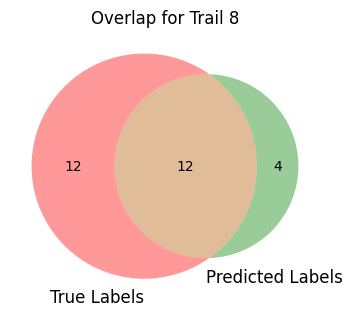

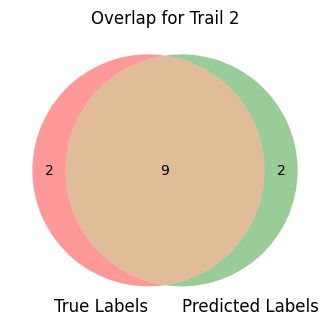

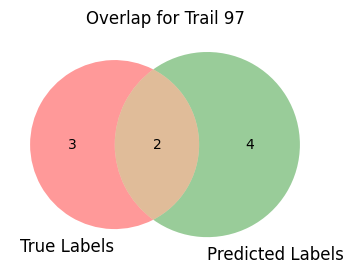

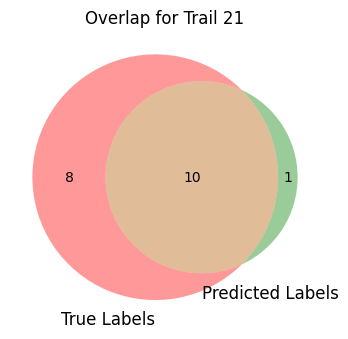

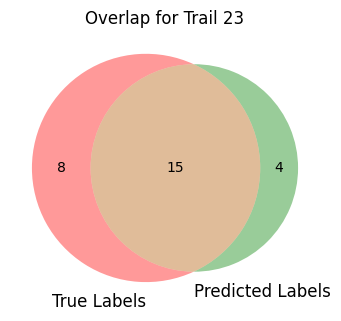

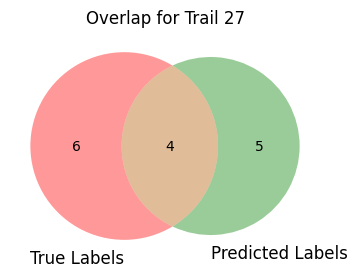

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

for i, label_index in enumerate(top_6_indices):
    # Get true and predicted labels
    true_labels = set(mlb.inverse_transform(y_test)[label_index])
    predicted_labels = set(predictions[label_index])

    plt.figure(figsize=(4, 4))
    venn2([true_labels, predicted_labels], set_labels=('True Labels', 'Predicted Labels'))
    plt.title(f'Overlap for Trail {label_index}')
    plt.show()

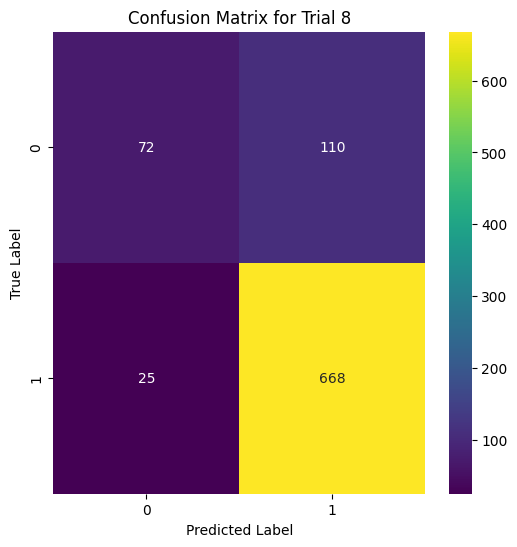

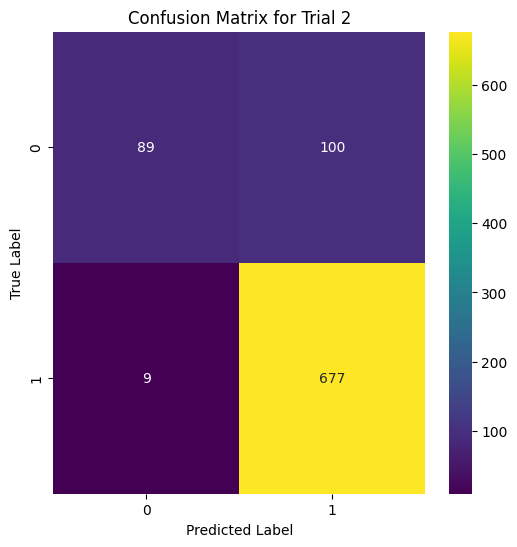

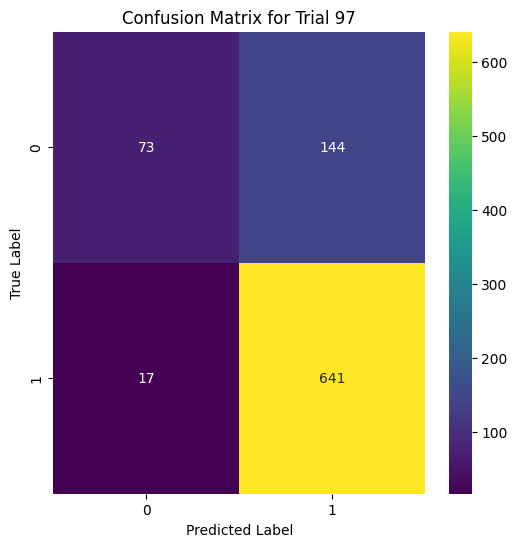

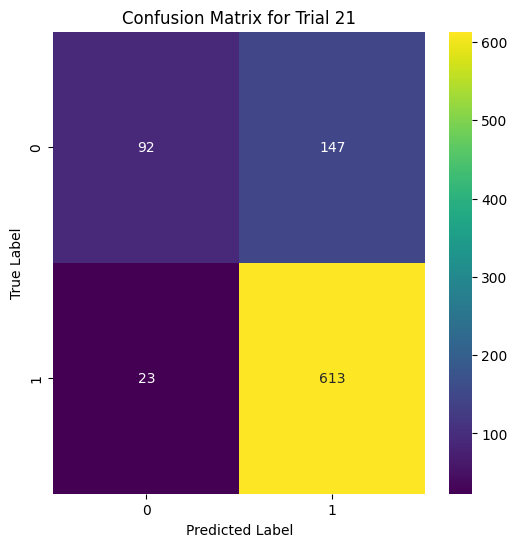

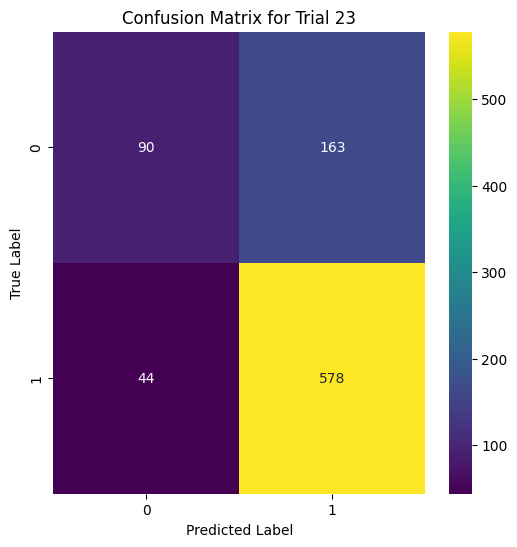

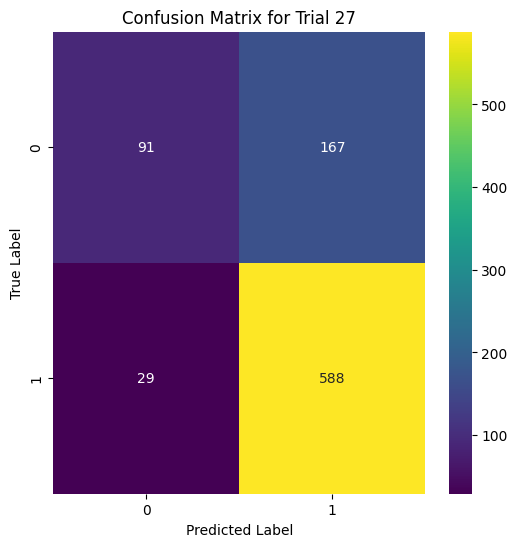

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrices = multilabel_confusion_matrix(y_test, predictions_binary)
for label_index in top_6_indices:
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrices[label_index], annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Trial {label_index}')
    plt.show()